# Importar bibliotecas
En este bloque se importan las bibliotecas necesarias:
- `numpy` para manejar datos numéricos.
- `tensorflow` para construir y entrenar el autoencoder.
- `matplotlib` para visualizar los resultados.
- `mnist` de `tensorflow.keras.datasets` para cargar el dataset de dígitos manuscritos.


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import sys
sys.stdout.reconfigure(encoding='utf-8')
sys.stderr.reconfigure(encoding='utf-8')

AttributeError: 'OutStream' object has no attribute 'reconfigure'

# Paso 1: Cargar y preparar los datos

En este primer paso, vamos a cargar el conjunto de datos MNIST, que contiene imágenes de dígitos manuscritos. Luego, normalizaremos las imágenes para que sus valores estén entre 0 y 1. Finalmente, separaremos las imágenes en dos conjuntos:
1. **Imágenes normales**: seleccionaremos solo las imágenes que corresponden al dígito 0 para entrenar nuestro modelo de autoencoder.
2. **Imágenes anómalas**: seleccionaremos las imágenes que no corresponden al dígito 0 para usar como datos de prueba.

Esto nos permitirá entrenar el autoencoder con datos "normales" (dígitos 0) y luego probar su capacidad para detectar anomalías (otros dígitos).





In [11]:
# Cargar MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Remodelar las imágenes para que sean vectores de 784 elementos (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Solo seleccionar imágenes de dígitos 0 para entrenar el autoencoder (imágenes normales)
x_train_normal = x_train[y_train == 0]
y_train_normal = y_train[y_train == 0]

# Solo seleccionar imágenes de dígitos diferentes a 0 para probar el modelo (anómalas)
x_test_anomalous = x_test[y_test != 0]
y_test_anomalous = y_test[y_test != 0]

# Paso 2: Definir y entrenar el Autoencoder

El autoencoder es un tipo de red neuronal que se entrena para reconstruir sus entradas. Su objetivo es aprender una representación comprimida de los datos en el espacio latente. En este paso, definimos la arquitectura del autoencoder con varias capas densas y entrenamos el modelo usando solo las imágenes normales (dígitos 0).

1. Definimos un **encoder** que reduce la dimensión de las imágenes de entrada.
2. Definimos un **decoder** que reconstruye las imágenes a partir de las representaciones latentes.
3. Entrenamos el modelo con las imágenes de dígitos 0.

Este autoencoder nos ayudará a aprender las características de las imágenes normales y nos permitirá detectar desviaciones o anomalías al comparar las reconstrucciones con las imágenes originales.

In [26]:
# Paso 1: Definir y entrenar el Autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu', name='encoded_layer')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss='binary_crossentropy')

# Entrenar el autoencoder solo con imágenes normales (dígitos 0)
autoencoder.fit(x_train_normal, x_train_normal, epochs=20, batch_size=64)

autoencoder.summary()

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4539
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2278
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2030
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1754
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1609
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1546
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1530
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1494
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1496
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1478
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1462
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1461
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1440
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1432
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1408
Epoch 16/20
93/

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_layer (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671,186 (2.56 MB)

 Trainable params: 223,728 (873.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 447,458 (1.71 MB)

# Paso 3: Extraer características con el Encoder

El encoder del autoencoder es la parte del modelo que aprende una representación comprimida de las imágenes de entrada. En este paso, utilizamos solo el encoder para extraer las características latentes de las imágenes. Estas características serán utilizadas más adelante para la clasificación de las imágenes como normales o anómalas.

1. Creamos un modelo **encoder** que toma las imágenes de entrada y las transforma en una representación latente de dimensión reducida.
2. Usamos este encoder para obtener las representaciones latentes de las imágenes tanto del conjunto de entrenamiento como del conjunto de prueba.

In [27]:
# Paso 2: Usar el encoder para extraer características
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoded_layer').output)

encoded_x_train = encoder.predict(x_train_normal)
encoded_x_test = encoder.predict(x_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Paso 4: Crear la Red Neuronal Feed-Forward para Clasificación

Una vez que tenemos las representaciones latentes de las imágenes, podemos usar estas características para entrenar un modelo de clasificación que detecte las anomalías. Definimos una red neuronal feed-forward (MLP) que toma como entrada las características extraídas por el autoencoder y predice si una imagen es normal o anómala.

1. Definimos una red neuronal simple con varias capas densas y funciones de activación ReLU.
2. Usamos **hinge loss** como función de pérdida, ya que queremos clasificar las imágenes como normales o anómalas.
3. Entrenamos el modelo con las características extraídas y las etiquetas correspondientes (1 para normal y -1 para anómala).

In [33]:
# Paso 3: Crear una Red Neuronal Feed-Forward para clasificación
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=16))  # Capa de entrada correspondiente a las características extraídas
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Para usar hinge loss, la activación final debe ser lineal
optimizer2 = Adam(learning_rate=0.00001)

early_stop = EarlyStopping(
    monitor='loss',       # O 'val_loss' si usas validación
    patience=10,           # Detén después de 5 épocas sin mejora
    mode='min',           # Queremos minimizar la pérdida
    restore_best_weights=True  # Restaurar los mejores pesos
)

def binary_accuracy_hinge(y_true, y_pred):
    return tf.reduce_mean(tf.cast(tf.equal(tf.sign(y_pred), y_true), tf.float32))
    
model.compile(optimizer=optimizer2, loss='hinge', metrics=[binary_accuracy_hinge])

# Etiquetas para la clasificación: convertir a 1 (anomalía) y -1 (normal)
y_train_normal_labels = np.ones(len(y_train_normal)) * -1  # Cero a -1 para normales
y_test_anomalous_labels = np.ones(len(x_test_anomalous))  # Anomalos como 1

# Paso 5: Entrenar la Red Neuronal

Una vez que hemos definido el modelo de clasificación, lo entrenamos utilizando las características extraídas por el autoencoder. Este proceso ajustará los pesos de la red neuronal para que pueda distinguir entre imágenes normales y anómalas.

1. Entrenamos el modelo con las características extraídas y las etiquetas correspondientes.
2. Usamos **early stopping** para detener el entrenamiento si no hay mejoras en la pérdida durante varias épocas.

In [34]:
# Entrenar la red neuronal con las características del autoencoder
model.fit(encoded_x_train, y_train_normal_labels, epochs=300, batch_size=128, callbacks=[early_stop])

Epoch 1/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy_hinge: 0.0024 - loss: 4.6068 
Epoch 2/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.0061 - loss: 4.1102 
Epoch 3/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.0083 - loss: 3.6615  
Epoch 4/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.0190 - loss: 3.3248
Epoch 5/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.0255 - loss: 3.0500  
Epoch 6/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy_hinge: 0.0437 - loss: 2.8050
Epoch 7/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.0704 - loss: 2.5403
Epoch 8/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.1034 - loss: 2.2964
Epoch 9/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.1496 - loss: 2.1190
Epoch 10/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy_hinge: 0.2075 - loss: 1.8707
Epoch 11/300


# Paso 6: Hacer Predicciones y Evaluar el Modelo

Una vez entrenado el modelo, lo usamos para hacer predicciones sobre el conjunto de prueba. Calculamos las puntuaciones de decisión para cada imagen y las clasificamos como normales o anómalas. Para esto, usaremos un umbral en las puntuaciones de decisión.

1. Generamos las puntuaciones de decisión para cada imagen.
2. Aplicamos un umbral para decidir si una imagen es normal o anómala.
3. Comparamos los resultados con las etiquetas reales para evaluar la precisión del modelo.

In [40]:
# Hacer predicciones para las imágenes de prueba (todas las imágenes)
encoded_x_test = encoder.predict(x_test)
y_pred_nn = model.predict(encoded_x_test)
decision_scores_test = y_pred_nn.flatten()

# Calcular puntuaciones de decisión y clasificar las imágenes

r = np.percentile(decision_scores_test, 40)  # Cambia el percentil según lo necesario
decision_scores = y_pred_nn.flatten() - r

predictions = (decision_scores >= 0).astype(int)  # 1: Anomalo, -1: Normal

predictions = np.where(predictions == 1, 1, -1)  # 1: Normal, -1: Anómalo

normal_images = np.sum(predictions == -1)  # Normales
anomalous_images = np.sum(predictions == 1)  # Anómalas

print(f"Normal Images: {normal_images}")
print(f"Anomalous Images: {anomalous_images}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Normal Images: 4000
Anomalous Images: 6000


# Paso 7: Visualización de resultados

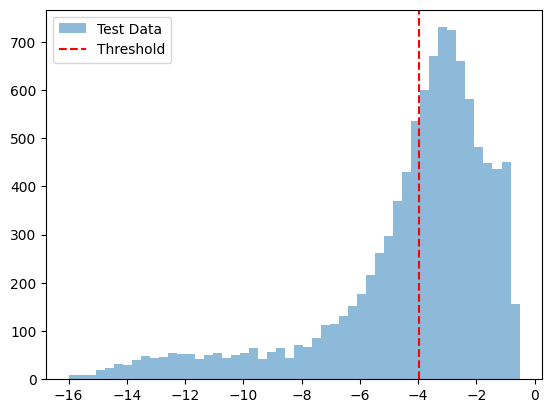

Número de ceros mal clasificados como anómalos: 5


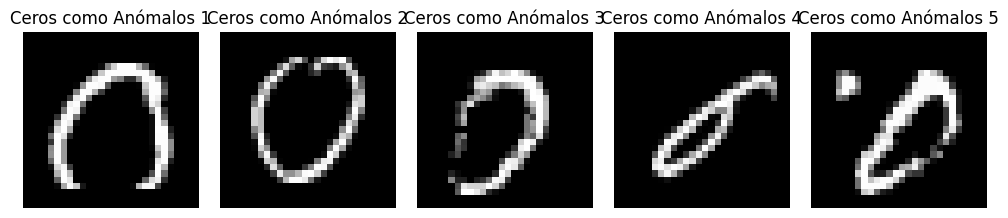

Número de ceros correctamente clasificados como normales: 975


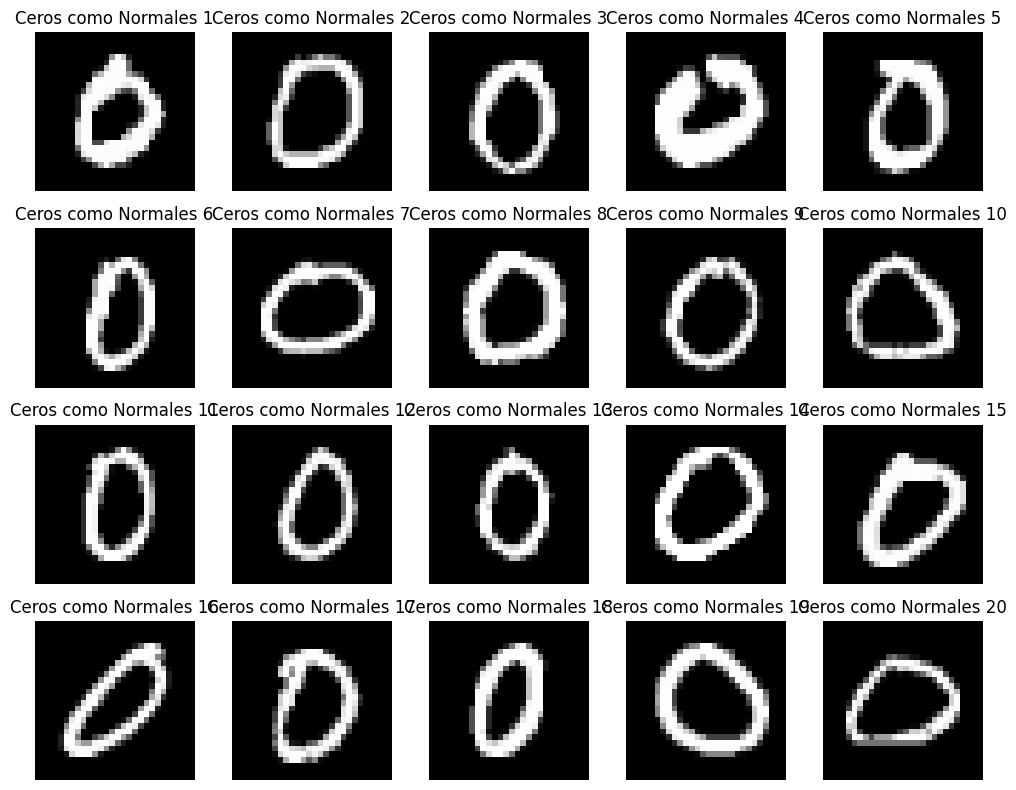

In [41]:
# Mostrar el histograma de las puntuaciones de decisión
plt.hist(decision_scores_test, bins=50, alpha=0.5, label='Test Data')
plt.axvline(x=r, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()


# Función para visualizar las imágenes clasificadas
def show_images(images, predictions, n=40, label='Normal', cols=10):
    # Filtrar las imágenes según la clase (Normal o Anomalous)
    if label == 'Normal':
        filtered_images = images[predictions == 0]
    else:
        filtered_images = images[predictions == 1]
    
    rows = (n // cols) + (n % cols != 0)  # Determinar el número de filas necesario

    # Mostrar las primeras 'n' imágenes filtradas
    plt.figure(figsize=(cols * 2, rows * 2))  # Tamaño ajustado a las filas y columnas
    for i in range(min(n, len(filtered_images))):
        plt.subplot(rows, cols, i + 1)  # Distribución de las imágenes en filas y columnas
        plt.imshow(filtered_images[i].reshape(28, 28), cmap="gray")
        plt.title(f'{label} {i+1}')
        plt.axis('off')
    plt.show()

# Mostrar imágenes normales (predicción 0) y anómalas (predicción 1)
# show_images(x_test, predictions, n=40, label='Normal', cols=10)   # Primeras 20 imágenes normales
# show_images(x_test, predictions, n=40, label='Anomalous', cols=10)

def show_images_by_digit(images, predictions, labels, digit, n=20, cols=5, title_label='Prediction'):
    """
    Muestra imágenes de un dígito específico con su predicción.

    :param images: array de imágenes a mostrar.
    :param predictions: array de predicciones asociadas a las imágenes.
    :param labels: etiquetas reales de las imágenes (0 para normal, 1 para anómalo).
    :param digit: dígito específico a filtrar para mostrar (por ejemplo, 0).
    :param n: número de imágenes a mostrar.
    :param cols: número de columnas en el grid.
    :param title_label: texto a mostrar en las etiquetas de las predicciones.
    """
    # Filtrar imágenes y predicciones según el dígito real
    digit_indices = (labels == digit)
    filtered_images = images[digit_indices]
    filtered_predictions = predictions[digit_indices]
    filtered_labels = labels[digit_indices]
    
    rows = (n // cols) + (n % cols != 0)  # Determinar número de filas necesario
    plt.figure(figsize=(cols * 2, rows * 2))  # Ajustar tamaño del grid

    for i in range(min(n, len(filtered_images))):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(filtered_images[i].reshape(28, 28), cmap="gray")
        pred_label = 'Normal' if filtered_predictions[i] == 0 else 'Anomalous'
        true_label = 'Normal' if filtered_labels[i] == 0 else 'Anomalous'
        plt.title(f'{title_label}: {pred_label}\nTrue: {true_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# Mostrar imágenes normales y anómalas con predicciones
# show_images_by_digit(x_test, predictions, y_test, digit=0, n=20, cols=5, title_label='Prediction')
# show_images_by_digit(x_test, predictions, y_test, digit=1, n=20, cols=5, title_label='Prediction')


# Mostrar las imágenes mal clasificadas
def show_misclassified(images, n=20, cols=5, title="Ceros como Anómalos"):
    rows = (n // cols) + (n % cols != 0)
    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(min(n, len(images))):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f'{title} {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Identificar los índices de los ceros predichos como anómalos
incorrect_indices = (y_test == 0) & (predictions == 1)

# Filtrar las imágenes mal clasificadas
misclassified_images = x_test[incorrect_indices]
misclassified_predictions = predictions[incorrect_indices]
misclassified_labels = y_test[incorrect_indices]

# Mostrar el número total de ceros clasificados erróneamente como anómalos
print(f"Número de ceros mal clasificados como anómalos: {len(misclassified_images)}")

# Visualizar las primeras 20 imágenes mal clasificadas
show_misclassified(misclassified_images, n=20, cols=5)


# Mostrar las imágenes correctamente clasificadas
def show_correctly_classified(images, n=20, cols=5, title="Ceros como Normales"):
    rows = (n // cols) + (n % cols != 0)
    plt.figure(figsize=(cols * 2, rows * 2))
    for i in range(min(n, len(images))):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f'{title} {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()



# Identificar los índices de los ceros correctamente predichos como normales
correct_indices = (y_test == 0) & (predictions == -1)

# Filtrar las imágenes correctamente clasificadas
correctly_classified_images = x_test[correct_indices]

# Mostrar el número total de ceros correctamente clasificados como normales
print(f"Número de ceros correctamente clasificados como normales: {len(correctly_classified_images)}")

# Visualizar las primeras 20 imágenes correctamente clasificadas
show_correctly_classified(correctly_classified_images, n=20, cols=5)